In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly as py
from datetime import datetime
from matplotlib.pyplot import figure
import plotly.express as px
import openpyxl
from openpyxl import Workbook
import os
from matplotlib.pyplot import figure
import scipy.stats as st
os.getcwd()

'/Users/robertozuniga/Desktop/kickstartstrategies'

In [2]:
#Import data 

data = pd.read_excel('data_daily.xlsx', engine ='openpyxl')

In [3]:
#Set time as index 

data = data.set_index('dates')

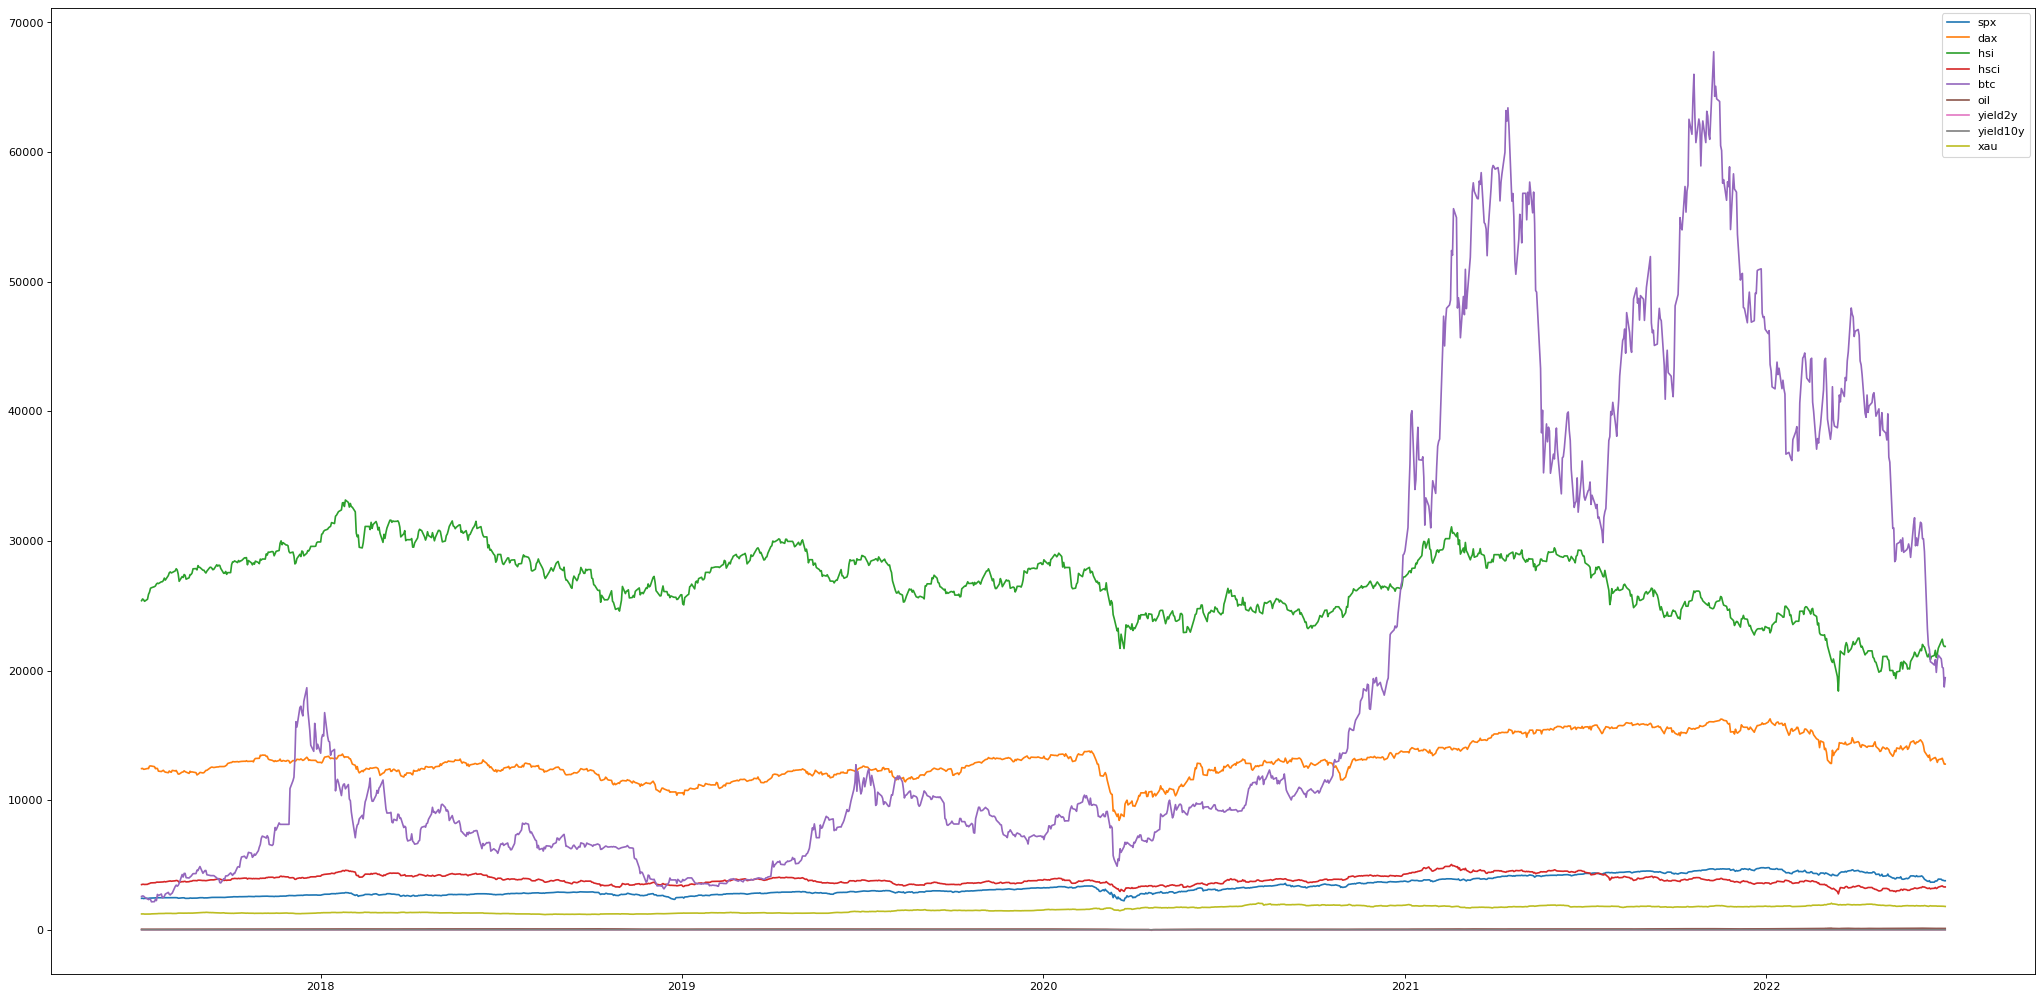

In [4]:
#Verify data import

figure(figsize=(32, 16), dpi=80)
plt.plot(data['spx'], label='spx')
plt.plot(data['dax'], label='dax')
plt.plot(data['hsi'], label='hsi')
plt.plot(data['hsci'], label='hsci')
plt.plot(data['btc'], label='btc')
plt.plot(data['oil'], label='oil')
plt.plot(data['yield2y'], label='yield2y')
plt.plot(data['yield10y'], label='yield10y')
plt.plot(data['xau'], label='xau')
plt.legend(loc='best')
plt.show()

In [5]:
#Calculate rolling window correlation coeficient  (60 days)


rolling_window = 60

window_SPX_DAX = data['dax'].rolling(rolling_window).corr(data['spx'])
window_SPX_HSI = data['hsi'].rolling(rolling_window).corr(data['spx'])
window_SPX_HCSI = data['hsci'].rolling(rolling_window).corr(data['spx'])
window_SPX_BCT = data['btc'].rolling(rolling_window).corr(data['spx'])
window_SPX_OIL = data['oil'].rolling(rolling_window).corr(data['spx'])
window_SPX_YIELD2Y = data['yield2y'].rolling(rolling_window).corr(data['spx'])
window_SPX_YIELD10Y = data['yield10y'].rolling(rolling_window).corr(data['spx'])
window_SPX_XAU = data['xau'].rolling(rolling_window).corr(data['spx'])

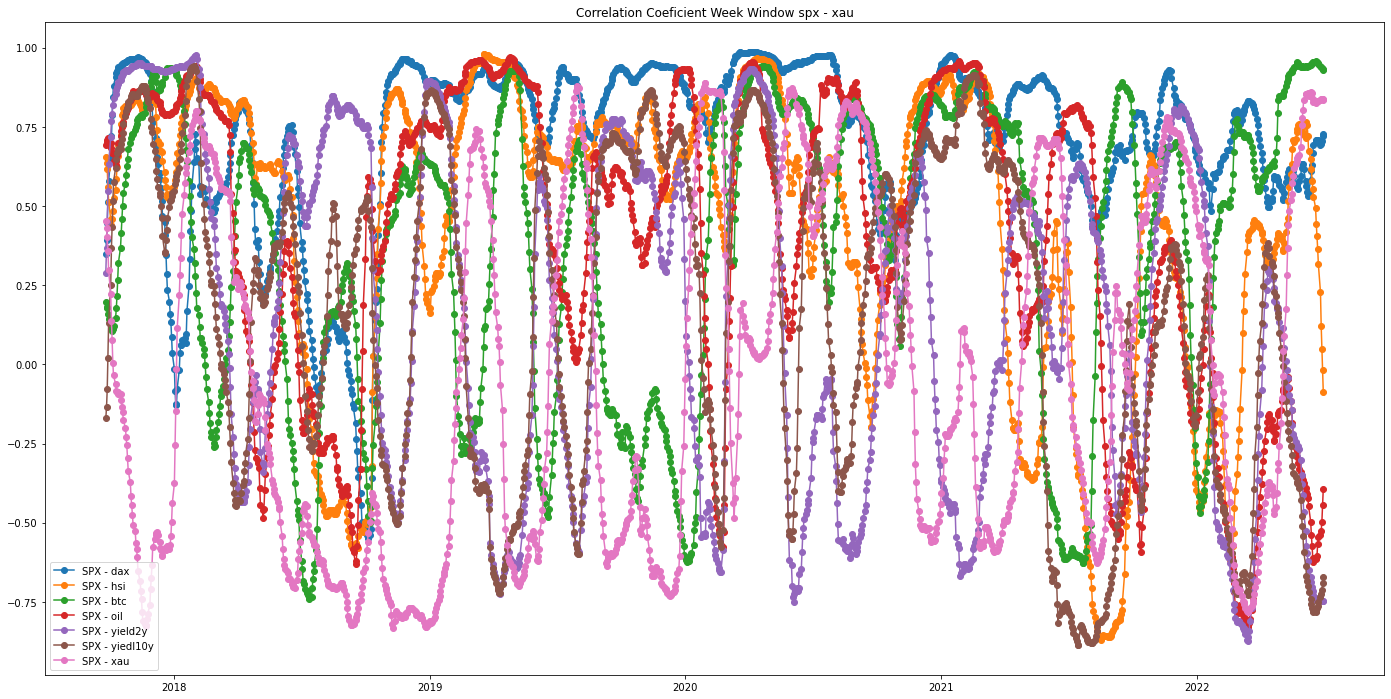

In [6]:
#Plot correlations

windows = [
(window_SPX_DAX, 'dax'),
(window_SPX_HSI, 'hsi'),
(window_SPX_BCT, 'btc'),
(window_SPX_OIL, 'oil'),
(window_SPX_YIELD2Y, 'yield2y'),
(window_SPX_YIELD10Y, 'yiedl10y'),
(window_SPX_XAU, 'xau')      
]



#Plot all varibales together 

plt.rcParams['figure.figsize'] = [24,12]
for window in windows:
    dataframe, ticker = window
    plt.plot(dataframe, marker='o', label = f'SPX - {ticker}')
    plt.title(f"Correlation Coeficient Week Window spx - {ticker}")
    plt.legend()

In [7]:
#Notes:

#After analyzing peaks con price percentage correlation, for extreme peaks, we have a 5 day rolling 
#window with a really low correlation, then correlation increases significantly and then the percentage change 
#is extreme 

#Usually extreme changes are not noisy and do not offer any significant insight 

In [8]:
#Plot distribution of correlations

for window in windows:
    dataframe, ticker = window
    fig = px.histogram(dataframe, title=f"Correlation Coeficient Week Window spx - {ticker}")
    fig.show()

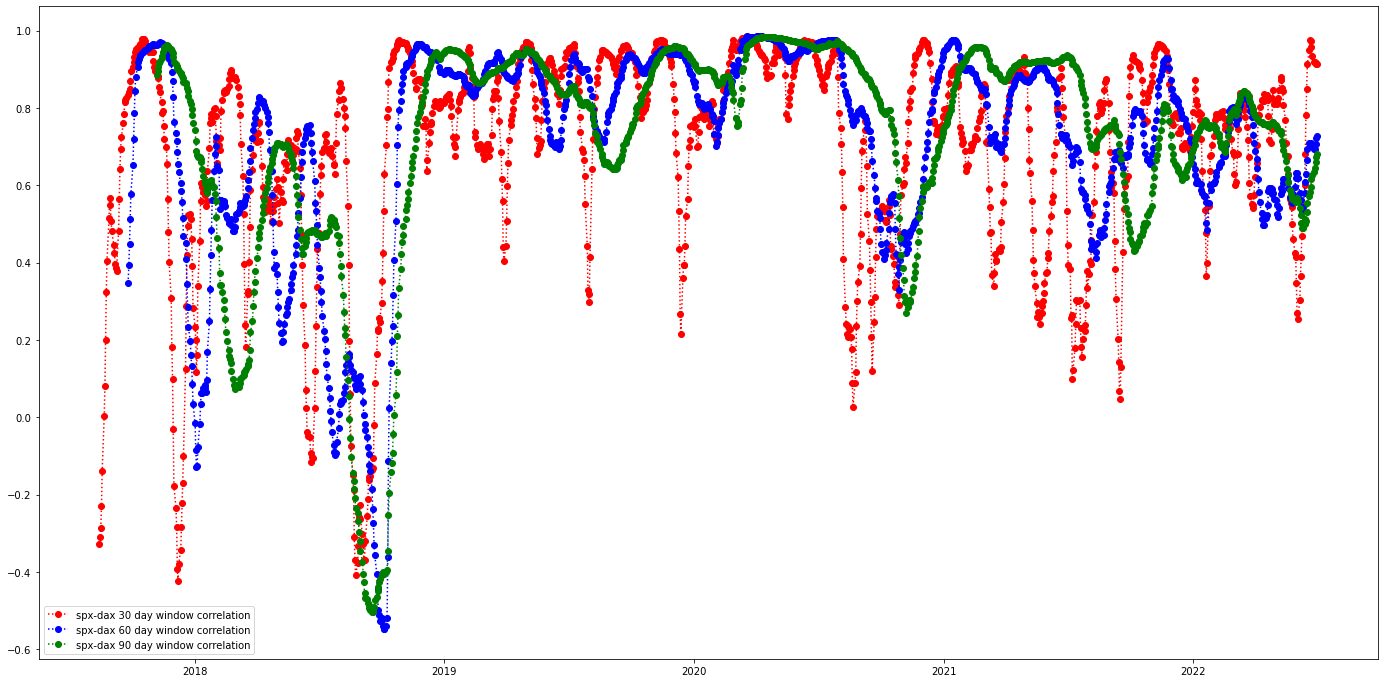

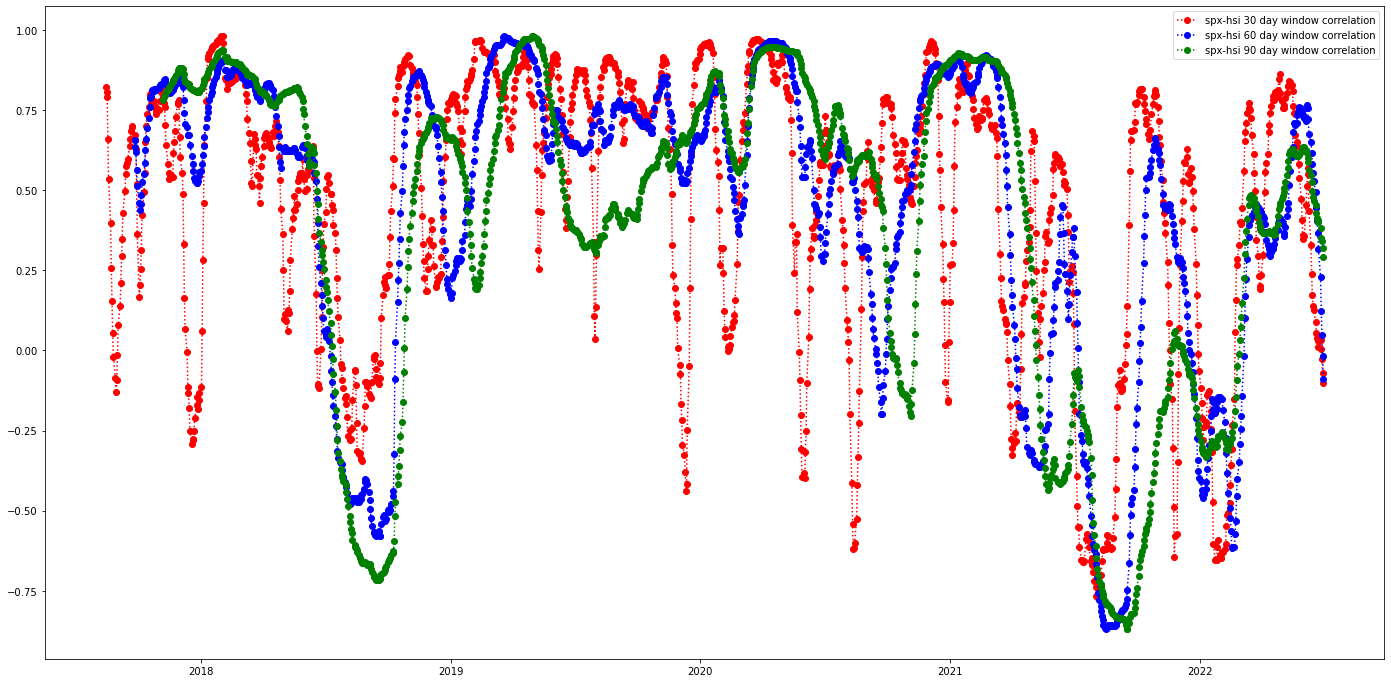

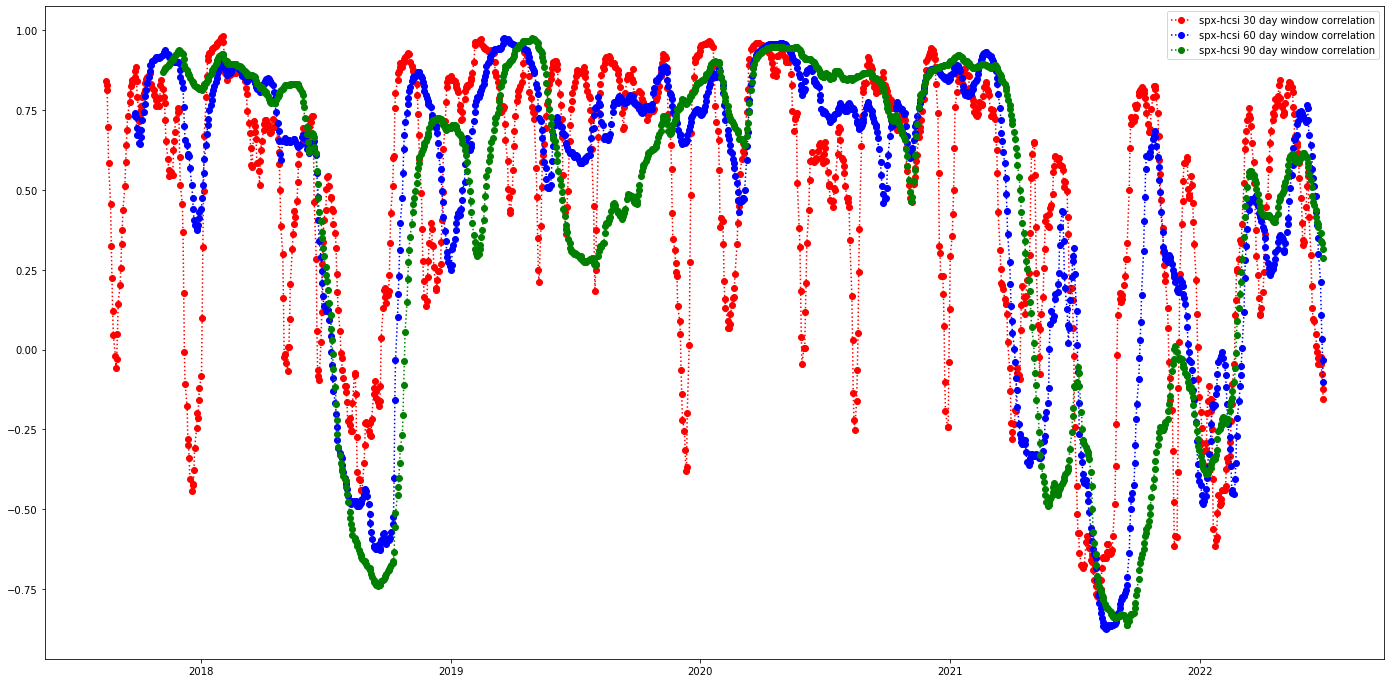

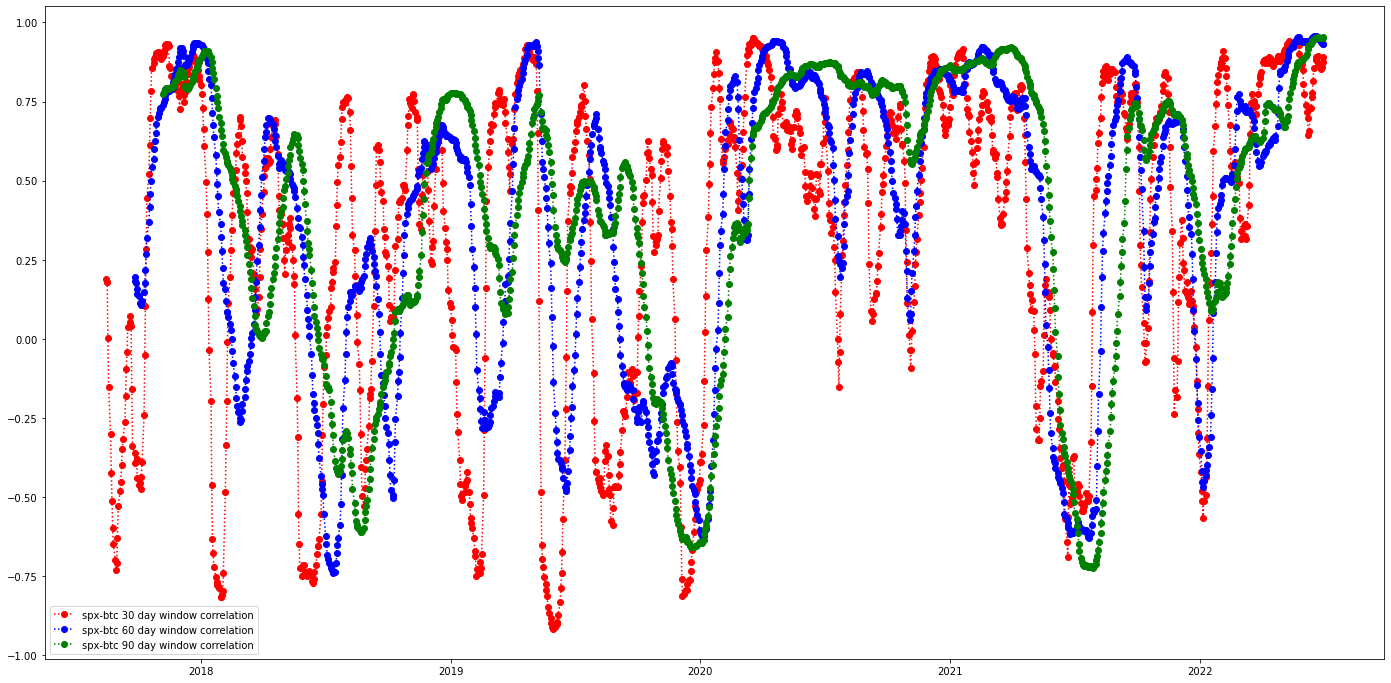

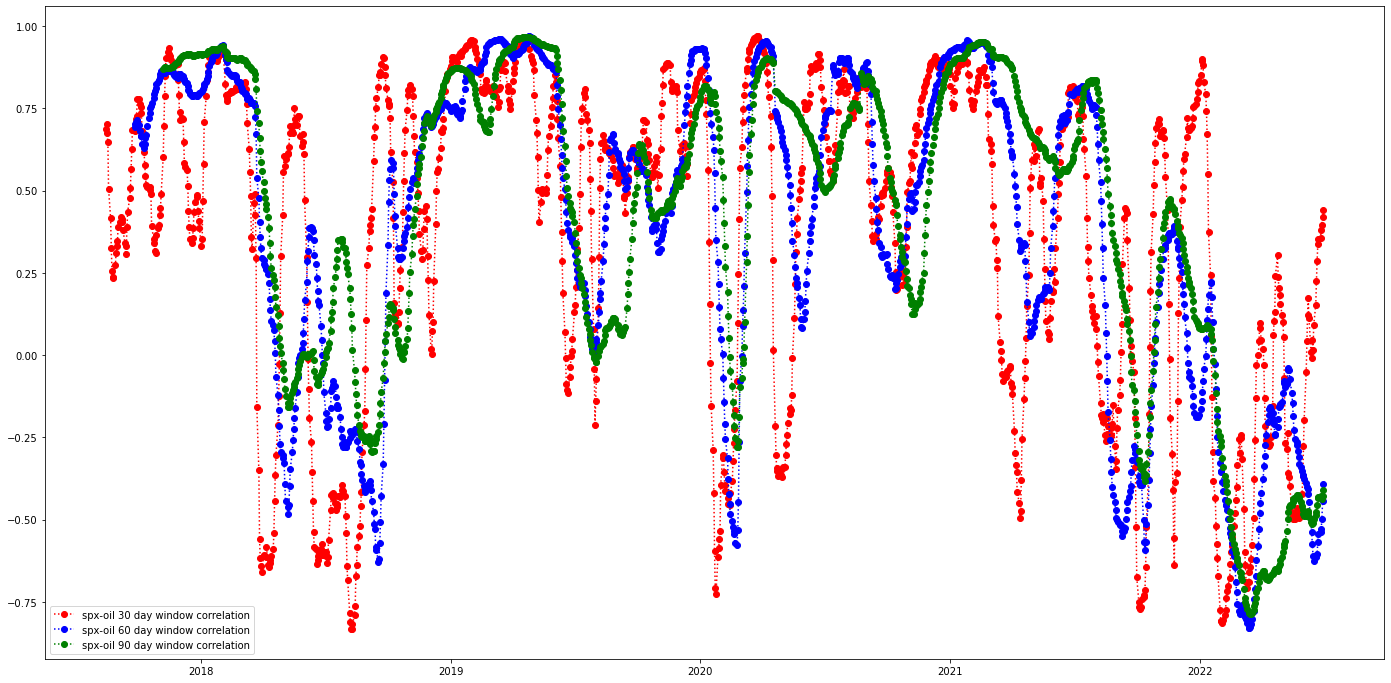

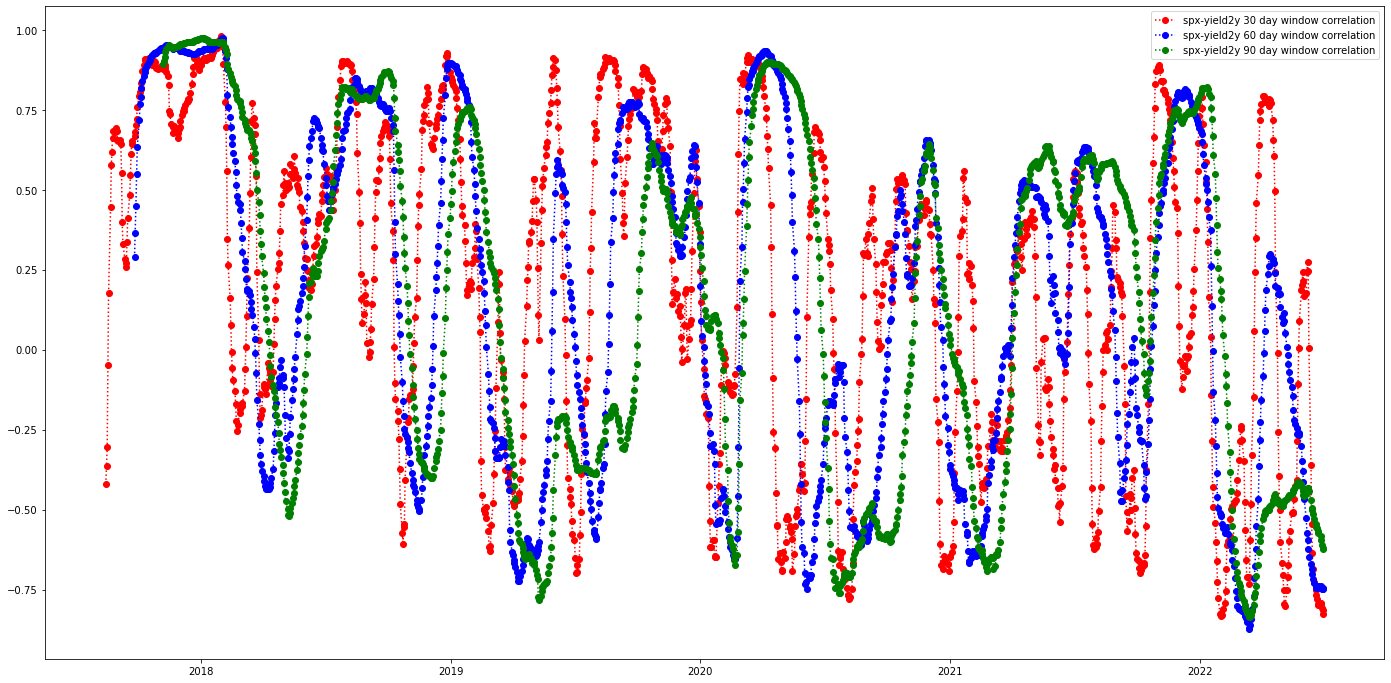

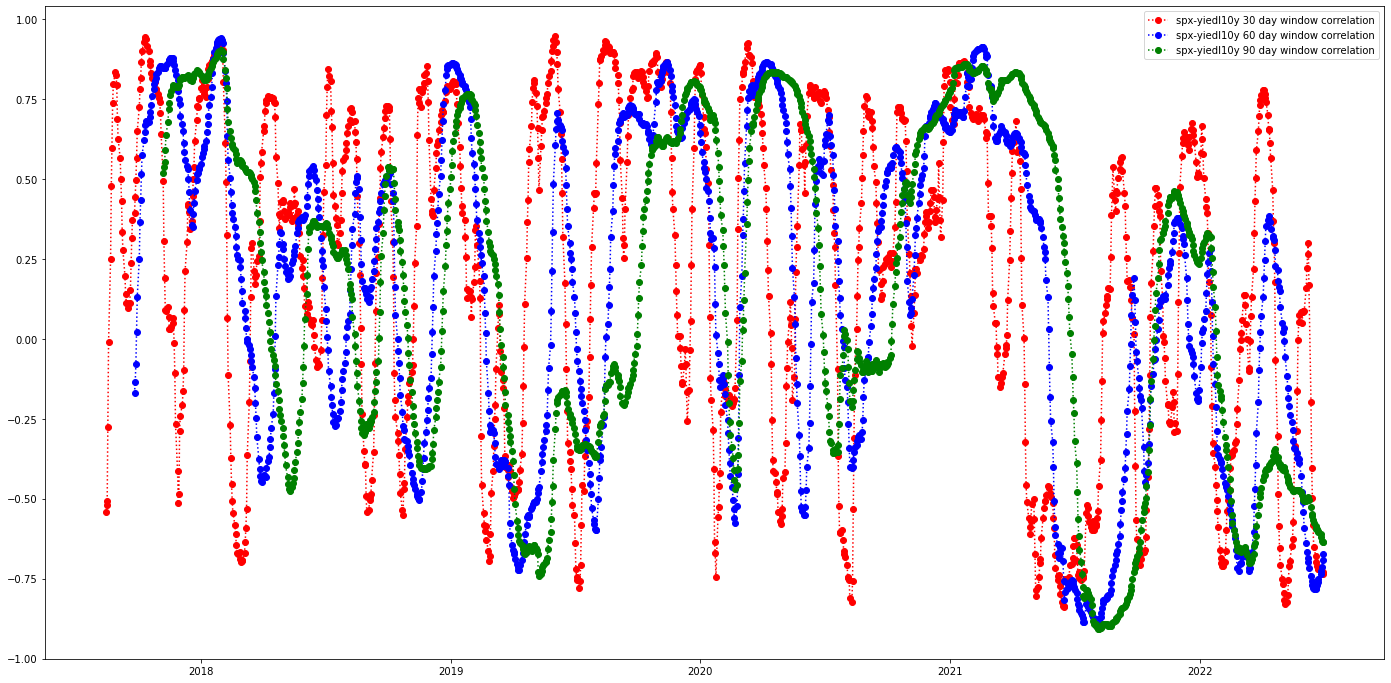

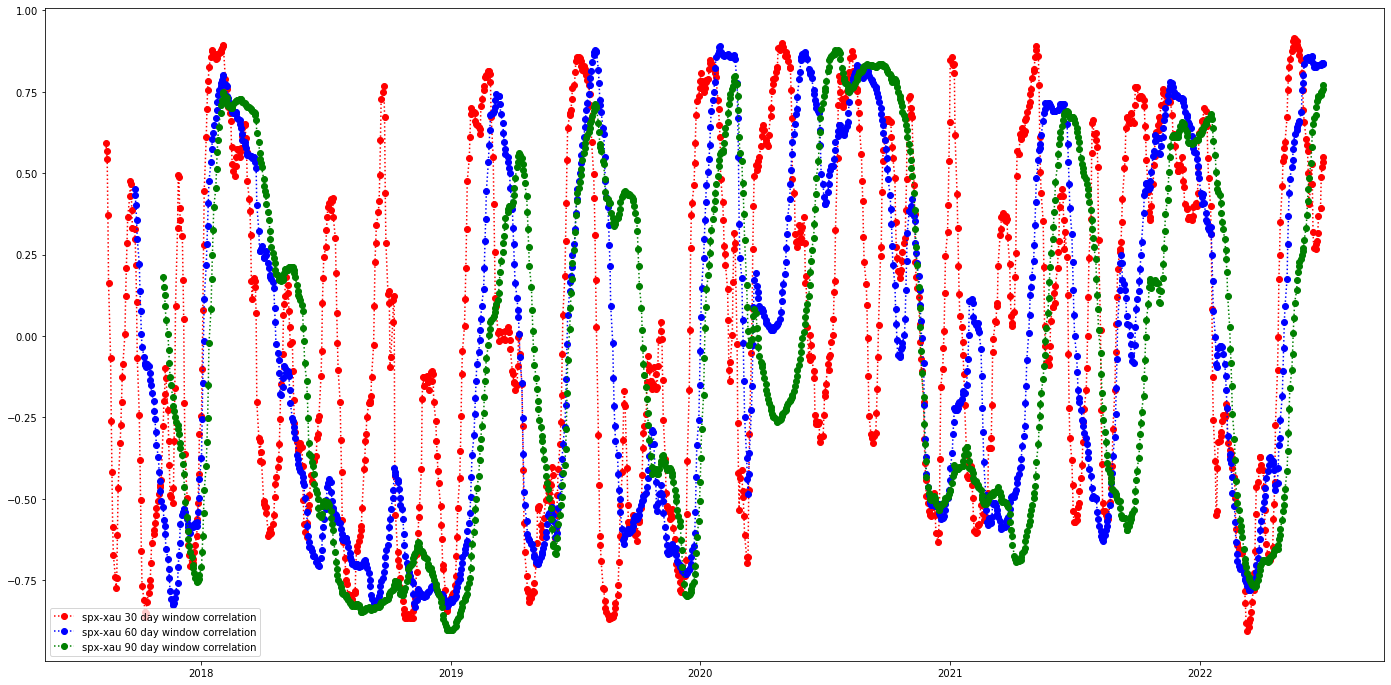

In [9]:
#Build up benchmark scores for correlations on data from moving windows 

#Build benchmark on 30 day rolling window 

month=30

d30_window_SPX_DAX = data['dax'].rolling(month).corr(data['spx'])
d30_window_SPX_HSI = data['hsi'].rolling(month).corr(data['spx'])
d30_window_SPX_HCSI = data['hsci'].rolling(month).corr(data['spx'])
d30_window_SPX_BCT = data['btc'].rolling(month).corr(data['spx'])
d30_window_SPX_OIL = data['oil'].rolling(month).corr(data['spx'])
d30_window_SPX_YIELD2Y = data['yield2y'].rolling(month).corr(data['spx'])
d30_window_SPX_YIELD10Y = data['yield10y'].rolling(month).corr(data['spx'])
d30_window_SPX_XAU = data['xau'].rolling(month).corr(data['spx'])


#Build benchmark on 60 day rolling window 

month2=60

d60_window_SPX_DAX = data['dax'].rolling(month2).corr(data['spx'])
d60_window_SPX_HSI = data['hsi'].rolling(month2).corr(data['spx'])
d60_window_SPX_HCSI = data['hsci'].rolling(month2).corr(data['spx'])
d60_window_SPX_BCT = data['btc'].rolling(month2).corr(data['spx'])
d60_window_SPX_OIL = data['oil'].rolling(month2).corr(data['spx'])
d60_window_SPX_YIELD2Y = data['yield2y'].rolling(month2).corr(data['spx'])
d60_window_SPX_YIELD10Y = data['yield10y'].rolling(month2).corr(data['spx'])
d60_window_SPX_XAU = data['xau'].rolling(month2).corr(data['spx'])


#Build benchmark on 90 day rolling window 

month3=90

d90_window_SPX_DAX = data['dax'].rolling(month3).corr(data['spx'])
d90_window_SPX_HSI = data['hsi'].rolling(month3).corr(data['spx'])
d90_window_SPX_HCSI = data['hsci'].rolling(month3).corr(data['spx'])
d90_window_SPX_BCT = data['btc'].rolling(month3).corr(data['spx'])
d90_window_SPX_OIL = data['oil'].rolling(month3).corr(data['spx'])
d90_window_SPX_YIELD2Y = data['yield2y'].rolling(month3).corr(data['spx'])
d90_window_SPX_YIELD10Y = data['yield10y'].rolling(month3).corr(data['spx'])
d90_window_SPX_XAU = data['xau'].rolling(month3).corr(data['spx'])



#Tuple with all 

all_windows = [
(d30_window_SPX_DAX, d60_window_SPX_DAX,d90_window_SPX_DAX , 'dax'),
(d30_window_SPX_HSI,d60_window_SPX_HSI,d90_window_SPX_HSI, 'hsi'),
(d30_window_SPX_HCSI,d60_window_SPX_HCSI,d90_window_SPX_HCSI, 'hcsi'),
(d30_window_SPX_BCT,d60_window_SPX_BCT,d90_window_SPX_BCT, 'btc'),
(d30_window_SPX_OIL,d60_window_SPX_OIL,d90_window_SPX_OIL, 'oil'),
(d30_window_SPX_YIELD2Y,d60_window_SPX_YIELD2Y,d90_window_SPX_YIELD2Y, 'yield2y'),
(d30_window_SPX_YIELD10Y,d60_window_SPX_YIELD10Y,d90_window_SPX_YIELD10Y, 'yiedl10y'),
(d30_window_SPX_XAU,d60_window_SPX_XAU,d90_window_SPX_XAU, 'xau')      
]


for window in all_windows:
    dataframe_30,dataframe_60,dataframe_90, ticker = window
    plt.plot(dataframe_30,color = 'r', linestyle = ':', label = f"spx-{ticker} 30 day window correlation", marker='o')
    plt.plot(dataframe_60,color = 'b', linestyle = ':', label = f"spx-{ticker} 60 day window correlation", marker='o')
    plt.plot(dataframe_90,color = 'g', linestyle = ':', label = f"spx-{ticker} 90 day window correlation", marker='o')
    plt.legend(loc='best')
    plt.show()

In [ ]:

combined = pd.DataFrame()
combined['spx'] = data['spx']
combined['spx'] = combined['spx'] / combined['spx'].iloc[0]
combined['dax'] = data['dax']
combined['dax'] = combined['dax'] / combined['dax'].iloc[0]
combined['hsi'] = data['hsi']
combined['hsi'] = combined['hsi'] / combined['hsi'].iloc[0]


combined['yield10y'] = data['yield10y']




combined['btc'] = data['btc']
combined['btc'] = combined['btc'] / combined['btc'].iloc[0]


plt.plot(combined['spx'], label='spx')
plt.plot(combined['dax'], label='dax')
plt.plot(combined['hsi'], label='hsi')

plt.legend()



plt.figure()
plt.plot(combined['btc'] - combined['spx'], label='spread')
plt.plot(combined['btc'], label='btc')
plt.plot(combined['spx'], label='spx')

plt.legend()

